In [18]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [19]:
#PASO 1. CARGAR BASE DE DATOS Y RUTAS
BaseAumentada = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 04/BaseLD.csv")
BaseAumentada

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,80,100,96,100,100,97,96,72,98,77,...,64,66,72,80,78,91,79,97,89,99
1,96,96,97,98,99,96,96,69,97,77,...,83,84,71,81,78,92,81,99,90,100
2,81,98,99,99,99,98,97,68,96,98,...,84,64,89,82,82,90,82,99,92,96
3,96,99,99,100,96,99,99,68,98,99,...,84,84,88,81,80,91,82,96,89,96
4,82,99,98,98,97,100,97,68,100,96,...,66,84,68,80,82,89,82,97,89,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27746,19,12,32,19,27,19,11,11,26,8,...,25,23,29,4,6,19,19,17,4,10
27747,20,9,32,18,25,19,10,10,27,12,...,26,27,12,21,20,18,22,16,5,9
27748,22,10,34,21,26,19,8,10,26,3,...,24,5,28,18,6,29,20,15,7,8
27749,20,12,33,20,24,22,9,11,23,6,...,24,27,12,20,18,28,9,14,5,12


In [20]:
#Inicializamos centroides random
# Etiquetar cada punto
# Actualizar centroides
# Repetir hasta que los centroides no cambien

In [21]:
# Inicializamos los centroides
centroides = []
aux = BaseAumentada.apply(lambda x: float(x.min()))
centroides.append(aux)
aux = BaseAumentada.apply(lambda x: float(x.max()))
centroides.append(aux)
aux = BaseAumentada.apply(lambda x: float(x.mean()))
centroides.append(aux)
centroides_df = pd.concat(centroides, axis=1)

In [22]:
def Actualiza_Centroides(data, pertenencia):
    return data.groupby(pertenencia).apply(lambda x: x.mean()).T

In [23]:
def graficar_centroides(data, pertenecia, centroides, iteracion):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroides_2d = pca.transform(centroides.T)
    clear_output(wait=True)
    plt.title(f'Iteración {iteracion}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=pertenecia)
    plt.scatter(x=centroides_2d[:,0], y=centroides_2d[:,1])
    plt.show()


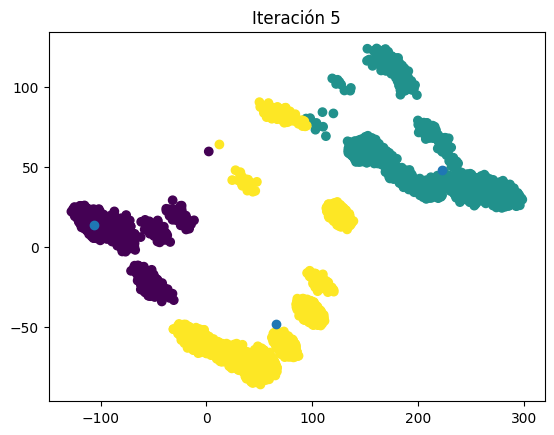

In [24]:
iteraciones = 100
centroides_iniciales = pd.DataFrame()
iteracion = 1

while iteracion < iteraciones and not centroides_df.equals(centroides_iniciales):
    centroides_iniciales = centroides_df

    distancias = centroides_df.apply(lambda x: np.sqrt(((BaseAumentada - x)**2).sum(axis=1)))
    pertenencias = distancias.idxmin(axis=1)
    centroides_df = Actualiza_Centroides(BaseAumentada, pertenencias)
    graficar_centroides(BaseAumentada, pertenencias, centroides_df, iteracion)
    iteracion += 1

In [25]:
centroides_df

,0,1,2
SegmentR,23.405339,86.510778,50.267449
PEPR,10.008329,98.022237,19.723813
AgeR,33.247901,87.089857,59.043578
TimeRelationR,20.303475,98.000454,61.924112
IncomeSourceR,25.323206,74.084638,41.932275
ActivityR,20.284359,84.852280,54.404277
NationalityR,10.010719,97.624234,47.158790
CommonAddR,9.982522,65.039256,53.836725
ProductTR,24.987028,69.816428,40.357020
SubproductR,8.084181,63.893578,38.100724


In [26]:
# Print means
suma_promedio = np.sum(centroides_df, axis=0) / 30
suma_promedio_df = pd.DataFrame({"Neurona": ["Neurona1", "Neurona2", "Neurona3"], "Suma.Promedio": suma_promedio})
suma_promedio_df

,Neurona,Suma.Promedio
0,Neurona1,17.559994
1,Neurona2,76.293215
2,Neurona3,47.711774


In [27]:
# Print Ownership
pertenencia_df = pd.DataFrame(pertenencias, columns=["Pertenencia"])
base_actualizada = pd.concat([pertenencia_df, BaseAumentada], axis=1)
base_actualizada

,Pertenencia,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,1,80,100,96,100,100,97,96,72,98,...,64,66,72,80,78,91,79,97,89,99
1,1,96,96,97,98,99,96,96,69,97,...,83,84,71,81,78,92,81,99,90,100
2,1,81,98,99,99,99,98,97,68,96,...,84,64,89,82,82,90,82,99,92,96
3,1,96,99,99,100,96,99,99,68,98,...,84,84,88,81,80,91,82,96,89,96
4,1,82,99,98,98,97,100,97,68,100,...,66,84,68,80,82,89,82,97,89,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27746,0,19,12,32,19,27,19,11,11,26,...,25,23,29,4,6,19,19,17,4,10
27747,0,20,9,32,18,25,19,10,10,27,...,26,27,12,21,20,18,22,16,5,9
27748,0,22,10,34,21,26,19,8,10,26,...,24,5,28,18,6,29,20,15,7,8
27749,0,20,12,33,20,24,22,9,11,23,...,24,27,12,20,18,28,9,14,5,12


In [28]:
base_actualizada["Pertenencia"].value_counts()

Pertenencia
0    14647
2     8697
1     4407
Name: count, dtype: int64

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(3)
kmeans.fit(BaseAumentada)

KMeans(n_clusters=3)

In [31]:
pd.DataFrame(kmeans.cluster_centers_, columns= BaseAumentada.columns).T

,0,1,2
SegmentR,50.011118,69.990076,23.397282
PEPR,10.079644,67.839990,10.008196
AgeR,53.198302,77.713551,33.248122
TimeRelationR,34.489590,98.005758,20.303510
IncomeSourceR,35.001011,63.483582,25.323180
ActivityR,50.042450,73.467287,20.284319
NationalityR,9.977360,96.919505,10.011064
CommonAddR,42.525167,66.715021,9.982243
ProductTR,33.431373,60.451973,24.986819
SubproductR,37.832424,52.187944,8.075058


In [71]:
#Calculando el índice H
centroide_global = np.mean(BaseAumentada)

#Numerador: sumatoria del cuadrado de las distancias euclidiana entre los centroides y el centro global de los puntos
SumCentroidesvsGlobal = np.sum(np.linalg.norm(centroides_df.to_numpy() - centroide_global, axis = 1) ** 2)

#Denominador: sumatoria de la sumatoria por cluster del cuadrado de la distancia entre los puntos con su respectivo cluster
SumCentroidesvsPuntos = 0
for cluster, centroide in enumerate(centroides_df):
    puntos_centroide = BaseAumentada[pertenencias == cluster]
    SumCentroidesvsPuntos += np.sum(np.linalg.norm(np.mean(centroides_df[cluster].to_numpy()) - puntos_centroide, axis=1) ** 2)

K = 3 #Número de centroides
m = BaseAumentada.shape[0]
#Hacemos la operación
IndiceH = (SumCentroidesvsGlobal / (K - 1)) / (SumCentroidesvsPuntos / (m - K))
IndiceH


4.318217417305634